# 凝聚階層集群(Agglomerative Hierarchical Clustering, AHC)

## 載入相關套件

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 生成資料

In [ ]:
np.random.seed(123)
variables = ['X', 'Y', 'Z'] # 3個變數(特徵)
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4'] # 5筆資料

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


## 計算集群彼此間的距離

In [ ]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')), # 計算列與列之間的距離, 使用歐氏距離
                        columns=labels,
                        index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


## 計算平均連結距離

 ID_0 與 ID_4 比較近.變成ID_5 ==> cluster1
 
 ID_1 與 ID_2 比較近.變成ID_6 ==> cluster2

 ID_3 與 ID_5 比較近.變成ID_7 ==> cluster3
 
 ID_6 與 ID_7 比較近.變成ID_8 ==> cluster4

In [ ]:
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(pdist(df, metric='euclidean'), method='average')
pd.DataFrame(row_clusters, # 將叢集結果轉成DataFrame
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])            


,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.141375,3.0
cluster 4,6.0,7.0,6.308931,5.0


## 繪製樹狀圖(dendrogram)

Text(0, 0.5, '歐幾里德距離')

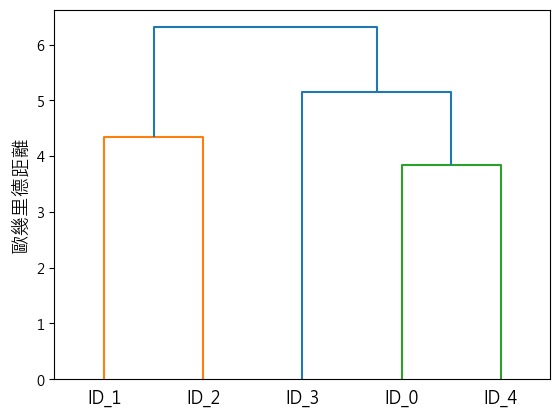

In [5]:
from scipy.cluster.hierarchy import dendrogram

# 修正中文亂碼 
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] #'Arial Unicode MS'
plt.rcParams['axes.unicode_minus'] = False

row_dendr = dendrogram(row_clusters, labels=labels)
plt.ylabel('歐幾里德距離', fontsize=14)

## 繪製熱力圖

C:\Users\monic\AppData\Local\Temp\ipykernel_34736\3646253901.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axm.set_xticklabels([''] + list(df_rowclust.columns))
C:\Users\monic\AppData\Local\Temp\ipykernel_34736\3646253901.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axm.set_yticklabels([''] + list(df_rowclust.index))


[Text(0, -1.0, ''),
 Text(0, 0.0, 'ID_4'),
 Text(0, 1.0, 'ID_0'),
 Text(0, 2.0, 'ID_3'),
 Text(0, 3.0, 'ID_2'),
 Text(0, 4.0, 'ID_1'),
 Text(0, 5.0, '')]

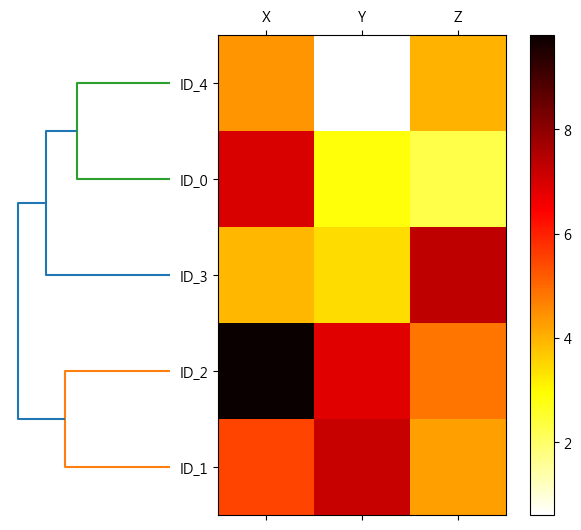

In [6]:
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])  # x-pos, y-pos, width, height

# 樹狀圖顯示在左邊
row_dendr = dendrogram(row_clusters, orientation='left')

# 降冪排序
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

# 不顯示刻度
axd.set_xticks([])
axd.set_yticks([])

# 不顯示座標軸
for i in axd.spines.values():
    i.set_visible(False)

# 繪製熱力圖
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

## Scikit-learn AgglomerativeClustering

In [7]:
from sklearn.cluster import AgglomerativeClustering

# 分 3 類
ac = AgglomerativeClustering(n_clusters=3, 
                             metric='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X) # X 為原始資料, 非距離矩陣, fit_predict()會回傳每筆資料所屬的類別(標籤)
print('Cluster labels: %s' % labels)

Cluster labels: [1 0 0 2 1]


In [8]:
# 分 2 類
ac = AgglomerativeClustering(n_clusters=2, 
                             metric='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]


## 使用鳶尾花資料集測試

[[1.01000000e+02 1.42000000e+02 0.00000000e+00 2.00000000e+00]
 [7.00000000e+00 3.90000000e+01 1.00000000e-01 2.00000000e+00]
 [0.00000000e+00 1.70000000e+01 1.00000000e-01 2.00000000e+00]
 [9.00000000e+00 3.40000000e+01 1.00000000e-01 2.00000000e+00]
 [1.28000000e+02 1.32000000e+02 1.00000000e-01 2.00000000e+00]
 [1.00000000e+01 4.80000000e+01 1.00000000e-01 2.00000000e+00]
 [4.00000000e+00 3.70000000e+01 1.41421356e-01 2.00000000e+00]
 [1.90000000e+01 2.10000000e+01 1.41421356e-01 2.00000000e+00]
 [2.90000000e+01 3.00000000e+01 1.41421356e-01 2.00000000e+00]
 [5.70000000e+01 9.30000000e+01 1.41421356e-01 2.00000000e+00]
 [8.00000000e+01 8.10000000e+01 1.41421356e-01 2.00000000e+00]
 [1.16000000e+02 1.37000000e+02 1.41421356e-01 2.00000000e+00]
 [8.00000000e+00 3.80000000e+01 1.41421356e-01 2.00000000e+00]
 [3.00000000e+00 4.70000000e+01 1.41421356e-01 2.00000000e+00]
 [2.70000000e+01 2.80000000e+01 1.41421356e-01 2.00000000e+00]
 [8.20000000e+01 9.20000000e+01 1.41421356e-01 2.000000

AttributeError: 'int' object has no attribute 'dtype'

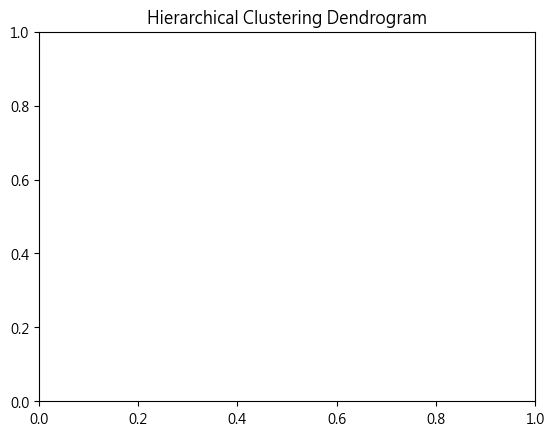

In [12]:
from sklearn.datasets import load_iris

# 繪製樹狀圖
def plot_dendrogram(model, **kwargs):
    # 計算每個集群的筆數
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # 以下可以顯示所有資料型態, 自己添加的程式碼 --- 2025.10.08

    print(linkage_matrix) # 顯示 linkage_matrix 的內容
    print(linkage_matrix.shape) # 顯示 linkage_matrix 的形狀
    print(type(linkage_matrix)) # 顯示 linkage_matrix 的類型
    print(linkage_matrix.dtype) # 顯示 linkage_matrix 的資料型態
    print(model.children_) # 顯示 model.children_ 的內容
    print(model.children_.shape) # 顯示 model.children_ 的形狀
    print(type(model.children_)) # 顯示 model.children_ 的類型
    print(model.children_.dtype) # 顯示 model.children_ 的資料型態
    print(model.distances_) # 顯示 model.distances_ 的內容
    print(model.distances_.shape) # 顯示 model.distances_ 的形狀
    print(type(model.distances_)) # 顯示 model.distances_ 的類型
    print(model.distances_.dtype) # 顯示 model.distances_ 的資料型態
    print(counts) # 顯示 counts 的內容
    print(counts.shape) # 顯示 counts 的形狀
    print(type(counts)) # 顯示 counts 的類型
    print(counts.dtype) # 顯示 counts 的資料型態
    print(n_samples) # 顯示 n_samples 的內容
    print(type(n_samples)) # 顯示 n_samples 的類型
    print(n_samples.dtype) # 顯示 n_samples 的資料型態

    #

    # 繪製樹狀圖
    dendrogram(linkage_matrix, **kwargs)

# 載入資料集
X, _ = load_iris(return_X_y=True) # 只取特徵資料, 不取標籤,所以用 _ 取代 y

# distance_threshold=0 表示會建立完整的樹狀圖(dendrogram)
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=6) # 限制階層=6
# plt.ylabel('歐幾里德距離', fontsize=14);#
# plt.xlabel("每個集群的筆數", fontsize=14)
plt.show()

## 各種距離衡量方式的比較

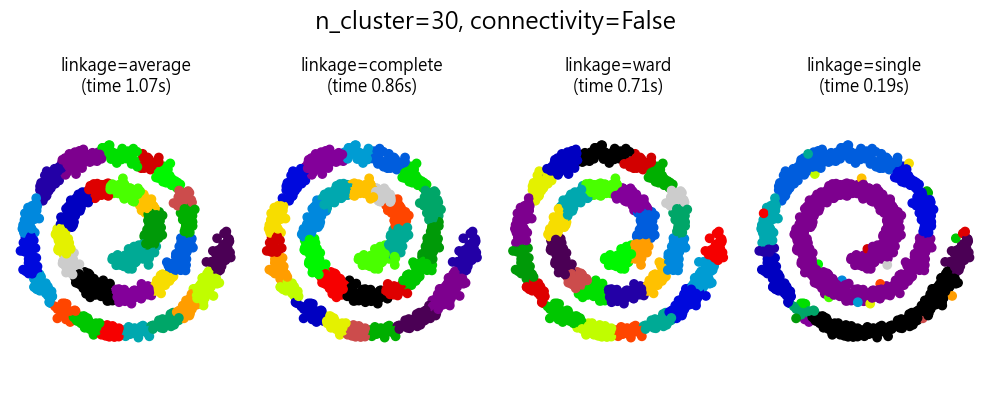

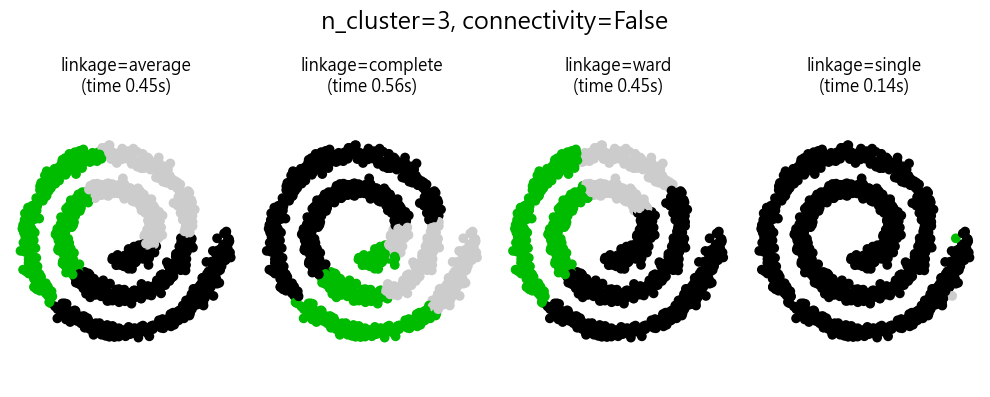

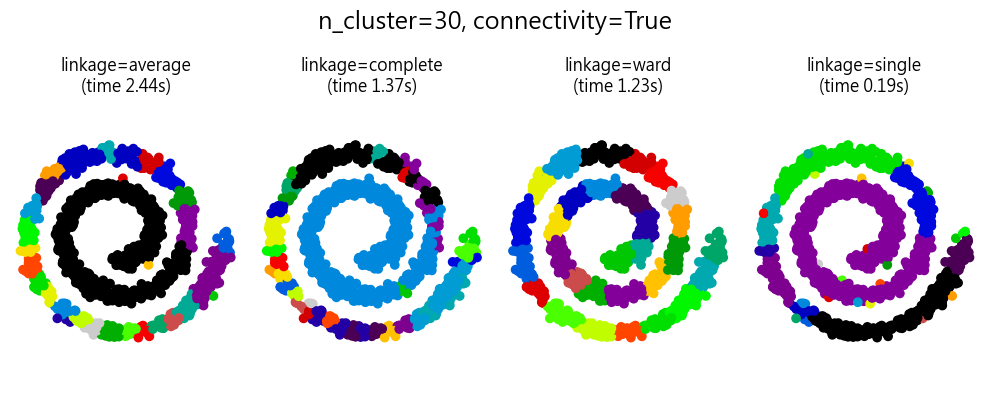

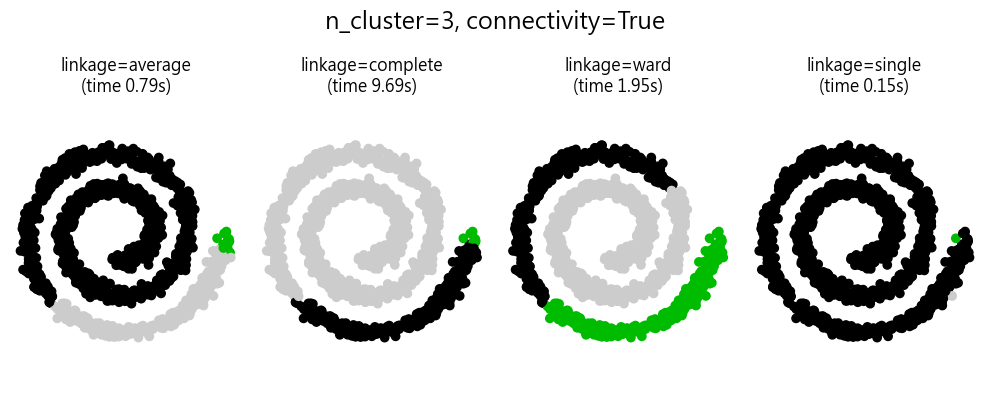

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

# Generate sample data
n_samples = 1500
np.random.seed(0)
t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
x = t * np.cos(t)
y = t * np.sin(t)


X = np.concatenate((x, y))
X += .7 * np.random.randn(2, n_samples)
X = X.T

# Create a graph capturing local connectivity. Larger number of neighbors
# will give more homogeneous clusters to the cost of computation
# time. A very large number of neighbors gives more evenly distributed
# cluster sizes, but may not impose the local manifold structure of
# the data
knn_graph = kneighbors_graph(X, 30, include_self=False)

for connectivity in (None, knn_graph):
    for n_clusters in (30, 3): # 分 30 類, 再分 3 類
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(('average',
                                         'complete',
                                         'ward',
                                         'single')):
            plt.subplot(1, 4, index + 1)
            model = AgglomerativeClustering(linkage=linkage,
                                            connectivity=connectivity,
                                            n_clusters=n_clusters)
            t0 = time.time()
            model.fit(X)
            elapsed_time = time.time() - t0
            plt.scatter(X[:, 0], X[:, 1], c=model.labels_,
                        cmap=plt.cm.nipy_spectral)
            plt.title('linkage=%s\n(time %.2fs)' % (linkage, elapsed_time),
                      fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')

            plt.subplots_adjust(bottom=0, top=.89, wspace=0,
                                left=0, right=1)
            plt.suptitle('n_cluster=%i, connectivity=%r' %
                         (n_clusters, connectivity is not None), size=17)
            plt.tight_layout()